# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

In [2]:
# Like usual we should always inspect our data before we jump in
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [3]:
# Men are codeed as a 1 in this dataset and females are coded as a 2 in the RIAGENDR column
gender = da['RIAGENDR']
men = da[gender == 1]
women = da[gender == 2]

In [13]:
# We need to get the total number of men and those who smoke. We need the same numbers for females as well
men_who_smoke_count = np.sum(men['SMQ020'] == 1)
men_count = men.size
"There are {} men, of whom {} of them are smokers".format(men_count, men_who_smoke_count)

'There are 77252 men, of whom 1413 of them are smokers'

In [14]:
women_who_smoke_count = np.sum(women['SMQ020'] == 1)
women_count = women.size
"There are {} women, of whom {} are smokers".format(women_count, women_who_smoke_count)

'There are 83328 women, of whom 906 are smokers'

In [7]:
# We can carry out the test of sig. for the diffence in two population proportions using the 
# formulas we have learned thus far

# First, we have to pool the percentages together to get a single proportion for our test
p1 = men_who_smoke_count / men_count
p2 = women_who_smoke_count / women_count
print("The proportion of men who smoke is {:.5f} while the proportion of women who smoke is {:.5f}".format(p1, p2))
phat = (men_count * p1 + women_count * p2) / (men_count + women_count)
print("Our value for p-hat is {:.5f}".format(phat))

The proportion of men who smoke is 0.01829 while the proportion of women who smoke is 0.01087
Our value for p-hat is 0.01444


In [8]:
# Second we have to compute the standard error of this pooled phat
standard_error = np.sqrt(phat * (1 - phat) * (1 / men_count + 1 / women_count))
print("The standard error of our measurement is {:.5f}".format(standard_error))

The standard error of our measurement is 0.00060


In [9]:
# Lastly, we can compute our z-value for our test
z = (p1 - p2) / standard_error
print("Our value of z is {:.2f}".format(z))

Our value of z is 12.45


In [10]:
# From this, we can compute our p-value -- remember this is a two sided test so we need to 
# multiply the final result by two
p_one_tail = 1 - scipy.stats.norm.cdf(z)
p_two_tail = 2 * p_one_tail
"Our p-value is {:.30f}".format(p_two_tail)

'Our p-value is 0.000000000000000000000000000000'

**Built-in Approach**

In [15]:
from statsmodels.stats.proportion import proportions_ztest

# Define counts of smokers and total samples
smokers_counts = np.array([men_who_smoke_count, women_who_smoke_count])
sample_sizes = np.array([men_count, women_count])

# Perform two-proportion z-test
z_stat, p_value = proportions_ztest(smokers_counts, sample_sizes, alternative='two-sided')

print(f'Z-statistic: {z_stat}')
print(f'P-value: {p_value}')

# Interpretation
if p_value < 0.05:
    print("Reject H0: The proportions of male and female smokers are significantly different.")
else:
    print("Fail to reject H0: No significant difference in smoking proportions between men and women.")


Z-statistic: 12.449474012047252
P-value: 1.4076980619623232e-35
Reject H0: The proportions of male and female smokers are significantly different.


__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

We have sufficient evidence to support the claim that the population proportion of men who smoke is different from the population proportion of females who smoke.

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [11]:
# It will be useful to have our z-multiplier handy beforehand for a 95% two-sided interval 
z_multiplier = scipy.stats.norm.ppf(0.975)

# First, lets compute the interval for males:
lower_bound_males = p1 - z_multiplier * np.sqrt(p1 * (1 - p1) / men_count)
upper_bound_males = p1 + z_multiplier * np.sqrt(p1 * (1 - p1) / men_count)
"A confidence interval for the population proportion of males who smoke is from {:.6f} to {:.6f}".format(
    lower_bound_males, 
    upper_bound_males
)

'A confidence interval for the population proportion of males who smoke is from 0.017346 to 0.019236'

In [12]:
# Next, we do the same for females
lower_bound_females = p2 - z_multiplier * np.sqrt(p2 * (1 - p2) / women_count)
upper_bound_females = p2 + z_multiplier * np.sqrt(p2 * (1 - p2) / women_count)
"A confidence interval for the population proportion of females who smoke is from {:.6f} to {:.6f}".format(
    lower_bound_females, 
    upper_bound_females
)

'A confidence interval for the population proportion of females who smoke is from 0.010169 to 0.011577'

In [14]:
# Lastly, we can compute the confidence interval for the difference
standard_error_of_difference = np.sqrt(p1 * (1 - p1) / men_count + p2 * (1 - p2) / women_count)
lower_bound_difference = (p1 - p2) - z_multiplier * standard_error_of_difference
upper_bound_difference = (p1 - p2) + z_multiplier * standard_error_of_difference
"A confidence interval for the difference in the population proportion of males and females who smoke is from {:.6f} to {:.6f}".format(
    lower_bound_difference, 
    upper_bound_difference
)

'A confidence interval for the difference in the population proportion of males and females who smoke is from 0.006240 to 0.008597'

**Built-in Approach**

In [16]:
from statsmodels.stats.proportion import proportion_confint, confint_proportions_2indep

# Confidence level
alpha = 0.05

# Compute 95% confidence intervals for men and women proportions
ci_men = proportion_confint(count=men_who_smoke_count, nobs=men_count, alpha=alpha, method='normal')
ci_women = proportion_confint(count=women_who_smoke_count, nobs=women_count, alpha=alpha, method='normal')

# Compute 95% confidence interval for the difference in proportions
ci_difference = confint_proportions_2indep(count1=men_who_smoke_count, nobs1=men_count,
                                           count2=women_who_smoke_count, nobs2=women_count,
                                           alpha=alpha, method='wald')

# Print results
print(f"95% CI for proportion of men who smoke: {ci_men}")
print(f"95% CI for proportion of women who smoke: {ci_women}")
print(f"95% CI for difference in smoking proportions (men - women): {ci_difference}")


95% CI for proportion of men who smoke: (0.01734585589921952, 0.019235721276775926)
95% CI for proportion of women who smoke: (0.010168574804288316, 0.011576816900780808)
95% CI for difference in smoking proportions (men - women): (0.00623966826316763, 0.00859651720775869)


__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

We can see the confidence interval for the difference between $p_1$ and $p_2$ which was from $(0.006240, 0.008597)$ does not contain zero which supports our original hypothesis that the difference is significantly different from zero. This is the same as saying $p_1$ and $p_2$ are different in a magnitude that is statistically significant. 

It would be incorrect to use the confidence intervals for just $p_1$ or just $p_2$ to access the significant of their difference. While it is reassuring they do not overlap, the only confidence interval that can provide evidence that $p_1$ and $p_2$ are statistically different is the confidence interval for their differences. 

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

In [8]:
# First we will get dataframes for both the college graduate population and those who have 
# not graduated college
# graduated_college = da[da["DMDEDUC2"] == 5]
# not_graduated_college = da[[x !=5 for x in da["DMDEDUC2"]]]
# "We have {} people who graduated college and {} who did not graduate college in our sample".format(
#     graduated_college.shape[0], 
#     not_graduated_college.shape[0]
# )

In [19]:
# First we will get dataframes for both the college graduate population and those who have 
# not graduated college
graduated_college = da[da["DMDEDUC2"] == 5]
not_graduated_college = da[[x in [1,2,3,4] for x in da["DMDEDUC2"]]]
"We have {} people who graduated college and {} who did not graduate college in our sample".format(
    graduated_college.shape[0], 
    not_graduated_college.shape[0]
)

'We have 1366 people who graduated college and 4105 who did not graduate college in our sample'

In [38]:
# Extract the heights of the samples. It turns out we have some nan's in our dataset
# so we have to clean those out too..
height_college_grads = graduated_college['BMXHT'].dropna() 
height_non_college_grads = not_graduated_college['BMXHT'].dropna()

# Make sure that we cleaned the dataset properly
assert pd.notnull(height_college_grads).all()
assert pd.notnull(height_non_college_grads).all()

In [23]:
# If the standard deviations are at least within 2X of eachother, we can pool. Else we cannot 
# conduct a pooled test
sd_college_grad_heights = np.std(height_college_grads, ddof = 1)
sd_non_college_grad_heights = np.std(height_non_college_grads, ddof = 1)
display("The standard deviation of college grad heights is: {:.3f}".format(sd_college_grad_heights))
display("The standard deviation of non college grad heights is: {:.3f}".format(sd_non_college_grad_heights))

'The standard deviation of college grad heights is: 9.705'

'The standard deviation of non college grad heights is: 10.174'

In [24]:
# Since the standard deviations are so close (10.174 / 9.705 < 2), we can conduct a pooled 
# t-test for the differences in the means

# It is handy to have some general things computed about the two groups before we begin
n_college = graduated_college.shape[0]
n_no_college = not_graduated_college.shape[0]

In [25]:
# First compute sp, the pooled standard deviation
sp = np.sqrt(
    ((n_college - 1) * sd_college_grad_heights ** 2 + (n_no_college - 1) * sd_non_college_grad_heights ** 2) / 
    (n_college + n_no_college - 2)
)
sp

10.05923416897948

In [26]:
# Then compute the pooled standard error
pooled_se = sp * np.sqrt(1 / n_college + 1 / n_no_college)
pooled_se

0.314207353815695

In [27]:
# And then we can access if there is a statistically significant difference between them
degrees_of_freedom = n_college + n_no_college - 2
difference_in_heights = np.mean(height_college_grads) - np.mean(height_non_college_grads)
"The difference in the height of college grads less that of non-college grads is: {}".format(difference_in_heights)

'The difference in the height of college grads less that of non-college grads is: 2.3888317064988485'

In [28]:
t_stat = difference_in_heights / pooled_se
"Our t-test statistic is {:.3f}".format(t_stat)

'Our t-test statistic is 7.603'

In [29]:
# Find the two-tailed probability
one_tailed_prob = 1 - scipy.stats.t.cdf(t_stat, degrees_of_freedom)
two_tailed_prob = one_tailed_prob * 2
"Our p-value is: {:.5e}".format(two_tailed_prob)

'Our p-value is: 3.39728e-14'

__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

In [24]:
"With a p-value of {:.4e}, less than our alpha = 0.05, we have sufficient evidence to conclude the heights of college grads and non-college grads is different from zero.".format(two_tailed_prob) 

'With a p-value of 3.3973e-14, less than our alpha = 0.05, we have sufficient evidence to conclude the heights of college grads and non-college grads is different from zero.'

We can see there is a statistically significant difference, in our sample, between the heights of those who graduated from college and those who did not. Two things need to be taken with caution here though:

1. The actual magnitude of the difference is a little over 2cm on average. It is up to you, the analyst, to determine if this is practically significant. Does this difference matter? Notice, this is different than statistical significance. 
2. It is likely the sample used for NHanes is not a perfect random sample. There may be hidden bias in this sample that we are not aware of.
3. The sample size of both samples (college grads v non-college grads) are both pretty large. When the sample sizes are this large, almost *any* difference will be statistically significant. This is important because some analysts mistake practical significance with statistical significance: you should be just as careful with small sample sizes as you are with large sample sizes. 

**Built-in Approach**

In [34]:

# from scipy import stats

# # Perform Levene's test
# stat, p_value = stats.levene(height_college_grads, height_non_college_grads)

# print(f'Levene’s test statistic: {stat}')
# print(f'P-value: {p_value}')

# # Check the assumption
# if p_value > 0.05:
#     print("Fail to reject H0: Variances are equal (assume equal variances).")
# else:
#     print("Reject H0: Variances are not equal (assume unequal variances).")


In [39]:
# import scipy.stats as stats


# Perform the t-test for pooled two means
t_statistic, p_value = stats.ttest_ind(height_college_grads, height_non_college_grads, equal_var=True)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 7.569245765210209
P-value: 4.3868465661648286e-14


__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

In [35]:
# Compute the heights in inches
cm_to_inches = 1 / 2.54
height_college_grads = graduated_college['BMXHT'].dropna() * cm_to_inches 
height_non_college_grads = not_graduated_college['BMXHT'].dropna() * cm_to_inches

# Compute n1 and n2 along with the respective group standard deviations
n_college = graduated_college.shape[0]
n_no_college = not_graduated_college.shape[0]
sd_college_grad_heights = np.std(height_college_grads, ddof = 1)
sd_non_college_grad_heights = np.std(height_non_college_grads, ddof = 1)

# First compute sp, the pooled standard deviation
sp = np.sqrt(
    ((n_college - 1) * sd_college_grad_heights ** 2 + (n_no_college - 1) * sd_non_college_grad_heights ** 2) / 
    (n_college + n_no_college - 2)
)

# Then compute the pooled standard error
pooled_se = sp * np.sqrt(1 / n_college + 1 / n_no_college)

# Compute the degrees of freedom and difference in heights
degrees_of_freedom = n_college + n_no_college - 2
difference_in_heights = np.mean(height_college_grads) - np.mean(height_non_college_grads)

# Compute the t-test stat
t_stat = difference_in_heights / pooled_se
display("The t-test statistic is {:.2f}".format(t_stat))

one_tailed_prob = 1 - scipy.stats.t.cdf(t_stat, degrees_of_freedom)
two_tailed_prob = one_tailed_prob * 2
"Our p-value is: {:.5e}".format(two_tailed_prob)

'The t-test statistic is 7.60'

'Our p-value is: 3.39728e-14'

**Built-in Approach**

In [37]:
# Perform the t-test for pooled two means
t_statistic, p_value = stats.ttest_ind(height_college_grads, height_non_college_grads, equal_var=True)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 7.56924576521022
P-value: 4.3868465661645275e-14


We can see, and should expect, the values of the t-test statistic and the p-value are identical between the analysis done in centimeters and the analysis done in inches. For almost any analysis one should be skeptical if a change in units changes the outcome of an analysis. In general, within statistics, good tests-for-differences should be indifferent towards what units the outcome is measured in. 

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [26]:
# In this example, we are not going to do the long-hand math but rather we are 
# going to lean on the scipy package for its help in computing the p-value of the 
# result

# Single out men in the dataset
men = da[da['RIAGENDR'] == 1]

# Stratify the men based on their age
thirty_to_fourty = men.query('RIDAGEYR >= 30 & RIDAGEYR <= 40')
fifty_to_sixty = men.query('RIDAGEYR >= 50 & RIDAGEYR <= 60')

# Extract the BMI from each of the age groups above
thirty_to_fourty_bmi = thirty_to_fourty['BMXBMI']
fifty_to_sixty_bmi = fifty_to_sixty['BMXBMI']

In [27]:
# First, we have to see if the standard deviations are similar enough to pool the data
"The Standard Deviation for 30-40 year olds and 50-60 year olds is {:.2f} and {:.2f} respectively".format(
    np.std(thirty_to_fourty_bmi, ddof = 1), 
    np.std(fifty_to_sixty_bmi, ddof = 1)
)

'The Standard Deviation for 30-40 year olds and 50-60 year olds is 6.66 and 6.00 respectively'

The standard deviations are similar enough to pool the data so we will do just that

In [28]:
# Compute the p-value and t-test stat:
test_results = scipy.stats.ttest_ind(thirty_to_fourty_bmi, fifty_to_sixty_bmi, equal_var = True, nan_policy='omit')
"Non-log data: T-Test stat: {:.4f} | P-value: {:.4f}".format(
    test_results.statistic, 
    test_results.pvalue
)

'Non-log data: T-Test stat: 0.8984 | P-value: 0.3692'

In [27]:
# Do the same for the log of the data
log_thirty_to_fourty_bmi = [np.log(x) for x in thirty_to_fourty_bmi]
log_fifty_to_sixty_bmi = [np.log(x) for x in fifty_to_sixty_bmi]

log_test_results = scipy.stats.ttest_ind(log_thirty_to_fourty_bmi, log_fifty_to_sixty_bmi, equal_var = True, nan_policy='omit')
"Log data: T-Test stat: {:.4f} | P-value: {:.4f}".format(
    log_test_results.statistic, 
    log_test_results.pvalue
)

'Log data: T-Test stat: 0.7058 | P-value: 0.4805'

**Built-in Apprach**

In [40]:
import numpy as np
import scipy.stats as stats

# Filter dataset for men
men = da[da['RIAGENDR'] == 1]

# Stratify by age groups
bmi_30_40 = men.loc[(men['RIDAGEYR'] >= 30) & (men['RIDAGEYR'] <= 40), 'BMXBMI']
bmi_50_60 = men.loc[(men['RIDAGEYR'] >= 50) & (men['RIDAGEYR'] <= 60), 'BMXBMI']

# Check for equal variance using Levene’s test
levene_stat, levene_p = stats.levene(bmi_30_40.dropna(), bmi_50_60.dropna())

# Print variance test result
if levene_p > 0.05:
    print("Levene’s test: p-value = {:.4f} (Variances are equal)".format(levene_p))
else:
    print("Levene’s test: p-value = {:.4f} (Variances are NOT equal, but assuming equal variance)".format(levene_p))

# Perform t-test on raw BMI values (assuming equal variance)
t_stat_raw, p_value_raw = stats.ttest_ind(bmi_30_40, bmi_50_60, equal_var=True, nan_policy='omit')

# Log-transform BMI values
log_bmi_30_40 = np.log(bmi_30_40.dropna())
log_bmi_50_60 = np.log(bmi_50_60.dropna())

# Perform t-test on log-transformed BMI values (assuming equal variance)
t_stat_log, p_value_log = stats.ttest_ind(log_bmi_30_40, log_bmi_50_60, equal_var=True, nan_policy='omit')

# Print results
print(f"T-test on raw BMI: t-stat = {t_stat_raw:.4f}, p-value = {p_value_raw:.4f}")
print(f"T-test on log-transformed BMI: t-stat = {t_stat_log:.4f}, p-value = {p_value_log:.4f}")


Levene’s test: p-value = 0.1903 (Variances are equal)
T-test on raw BMI: t-stat = 0.8984, p-value = 0.3692
T-test on log-transformed BMI: t-stat = 0.7058, p-value = 0.4805


__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

We can see that taking the log of the data actually changes the p-value of the measurements. Unlike a change in units (which is a linear change), a non-linear change, like taking the log, actually changes the intrepretation of the data and thus it changes the analysis we are performing.

* For the non-log data (normal data) we are asking if the measures of BMI are the same or different across groups.
* For the log-data (transformed data) we are asking if the *magnitude* of the measures of BMI are the same or different across groups.

Each question, and analysis, has its place and there are motivations for doing one or the other depending on the question that you are trying to answer with statistics. 

In [28]:
"Log data: With a p-value of {:.4f}, greater than our alpha of 0.05, we have insufficient evidence to reject the null hypothesis that there is no significant difference betweeen the magnitude of the BMI of 30-40 year old males and 50-60 year old males".format(log_test_results.pvalue)

'Log data: With a p-value of 0.4805, greater than our alpha of 0.05, we have insufficient evidence to reject the null hypothesis that there is no significant difference betweeen the magnitude of the BMI of 30-40 year old males and 50-60 year old males'

In [29]:
"Non-Log data: With a p-value of {:.4f}, greater than our alpha of 0.05, we have insufficient evidence to reject the null hypothesis that there is no significant difference betweeen the BMI of 30-40 year old males and 50-60 year old males".format(test_results.pvalue)

'Non-Log data: With a p-value of 0.3692, greater than our alpha of 0.05, we have insufficient evidence to reject the null hypothesis that there is no significant difference betweeen the BMI of 30-40 year old males and 50-60 year old males'

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

In [29]:
# First filter for women who are between 30 and fourty years old
women = da.query('RIAGENDR == 2')
thirty_to_fourty = women.query('RIDAGEYR >= 30 & RIDAGEYR <= 40')

# Next, extract college grads and non-college grads
graduated_college = thirty_to_fourty.query('DMDEDUC2 == 5')
not_graduated_college = thirty_to_fourty.query('DMDEDUC2 in [1, 2, 3, 4]')
xx = thirty_to_fourty[[x in [1,2,3,4] for x in thirty_to_fourty["DMDEDUC2"]]]

# Lastly, extract the bmi for college and non-college grads
college_bmi = graduated_college['BMXBMI']
no_college_bmi = not_graduated_college['BMXBMI']

In [30]:
n_bmi_college = college_bmi.shape[0]
n_bmi_no_college = no_college_bmi.shape[0]
"We have {} bmi samples from those women between 30 and fourty years of age who have completed college and {} samples from those women between 30 and fourty years of age who have not".format(n_bmi_college, n_bmi_no_college)

'We have 174 bmi samples from those women between 30 and fourty years of age who have completed college and 358 samples from those women between 30 and fourty years of age who have not'

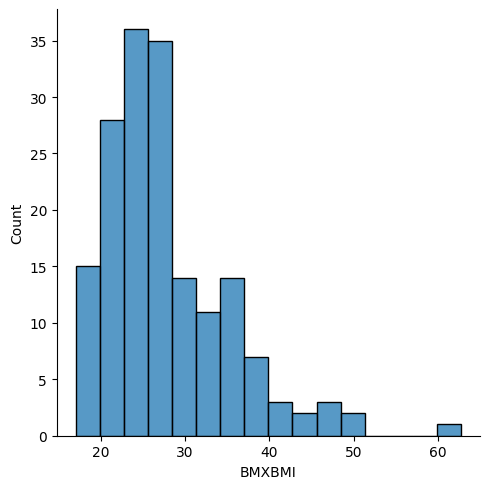

In [36]:
# First, lets compare the variance between the two populations using histograms

sns.displot(college_bmi)

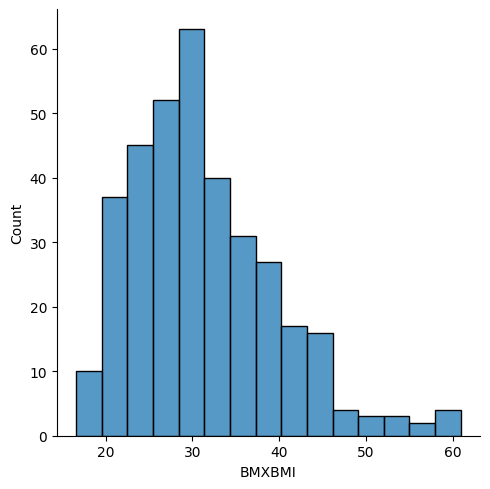

In [32]:
sns.displot(no_college_bmi)

We can see the variance in BMI for those who have not completed college is visually larger than the BMI for those women who have not completed college

In [37]:
# Now, lets compute the standard deviations
sd_college_bmi = np.std(college_bmi, ddof = 1)
sd_no_college_bmi = np.std(no_college_bmi, ddof = 1)
display("The standard deviation for the BMI for women with college experience is {:.4f}".format(sd_college_bmi))
display("The standard deviation for the BMI for women with no college experience is {:.4f}".format(sd_no_college_bmi))

'The standard deviation for the BMI for women with college experience is 7.3583'

'The standard deviation for the BMI for women with no college experience is 8.2561'

The numerical analysis agrees with our visual intuition that the spread of the variance of BMI is larger for those women who completed college is smaller than the variance of BMI for those women who did not

__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

In [38]:
# First, we have to run the statistical analysis to compare the two populations
# We will use the scipy package since we have already done the math long-hand above
ttest_result = scipy.stats.ttest_ind(college_bmi, no_college_bmi, equal_var=True, nan_policy="omit")

In [39]:
"The t-test stat for our analysis is {:.4f} and the corresponding p-value is {:.4e}".format(
    ttest_result.statistic, 
    ttest_result.pvalue
)

'The t-test stat for our analysis is -4.6439 and the corresponding p-value is 4.3298e-06'

In [40]:
("With a p-value of {:.2e}, less than our alpha of 0.05, we have ".format(ttest_result.pvalue) +
"sufficient evidence to conclude there is a significant difference between the " + 
"BMI of women between 30 and 40 years of age who have completed college compared to those "
"women who are between 30 and 40 years old who have not completed college")

'With a p-value of 4.33e-06, less than our alpha of 0.05, we have sufficient evidence to conclude there is a significant difference between the BMI of women between 30 and 40 years of age who have completed college compared to those women who are between 30 and 40 years old who have not completed college'

In [41]:
# Similarly, we can run a test for non-pooled variances
ttest_result = scipy.stats.ttest_ind(college_bmi, no_college_bmi, equal_var=False, nan_policy="omit")
display("The t-test stat for our analysis is {:.4f} and the corresponding p-value is {:.4e}".format(
    ttest_result.statistic, 
    ttest_result.pvalue
))
("With a p-value of {:.2e}, less than our alpha of 0.05, we have ".format(ttest_result.pvalue) +
"sufficient evidence to conclude there is a significant difference between the " + 
"BMI of women between 30 and 40 years of age who have completed college compared to those "
"women who are between 30 and 40 years old who have not completed college")

'The t-test stat for our analysis is -4.8337 and the corresponding p-value is 1.9621e-06'

'With a p-value of 1.96e-06, less than our alpha of 0.05, we have sufficient evidence to conclude there is a significant difference between the BMI of women between 30 and 40 years of age who have completed college compared to those women who are between 30 and 40 years old who have not completed college'

**Built-in Apprach**

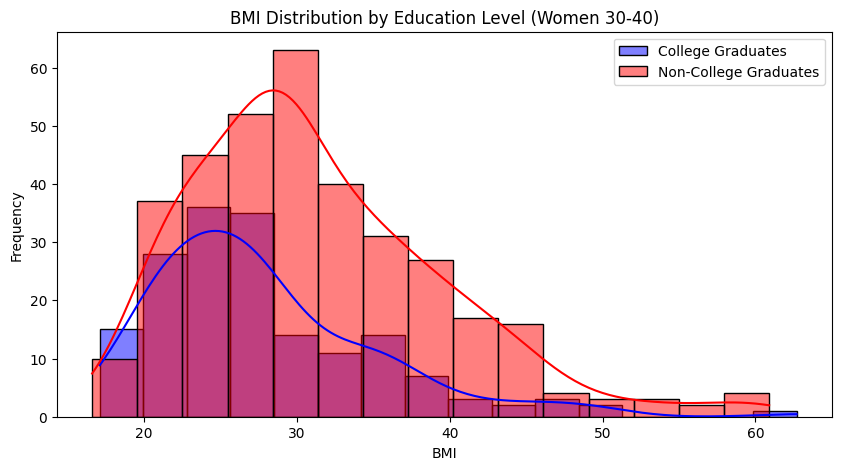

Levene’s test: p-value = 0.0553 (Variances are equal)
The pooled standard error is 0.7136
The non-pooled standard error is 0.7136
Pooled T-test: t-stat = -4.6439, p-value = 0.0000
Unpooled (Welch’s) T-test: t-stat = -4.8337, p-value = 0.0000


In [47]:
# import numpy as np
# import scipy.stats as stats
# import seaborn as sns
# import matplotlib.pyplot as plt

# Filter for women aged 30-40
women = da[da['RIAGENDR'] == 2]
women_30_40 = women[(women['RIDAGEYR'] >= 30) & (women['RIDAGEYR'] <= 40)]

# Extract college graduates and non-graduates
college_grads = women_30_40[women_30_40['DMDEDUC2'] == 5]
non_grads = women_30_40[women_30_40['DMDEDUC2'].isin([1, 2, 3, 4])]

# Extract BMI values
bmi_college = college_grads['BMXBMI'].dropna()
bmi_no_college = non_grads['BMXBMI'].dropna()

# Plot distributions to compare variance visually
plt.figure(figsize=(10,5))
sns.histplot(bmi_college, label="College Graduates", kde=True, color="blue", alpha=0.5)
sns.histplot(bmi_no_college, label="Non-College Graduates", kde=True, color="red", alpha=0.5)
plt.legend()
plt.title("BMI Distribution by Education Level (Women 30-40)")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

# Compute sample sizes and standard deviations
n_college = len(bmi_college)
n_no_college = len(bmi_no_college)
sd_college = np.std(bmi_college, ddof=1)
sd_no_college = np.std(bmi_no_college, ddof=1)

# Conduct Levene's test for equality of variances
levene_stat, levene_p = stats.levene(bmi_college, bmi_no_college)
if levene_p > 0.05:
    print(f"Levene’s test: p-value = {levene_p:.4f} (Variances are equal)")
else:
    print(f"Levene’s test: p-value = {levene_p:.4f} (Variances are NOT equal)")

# # Compute pooled standard error
pooled_se = np.sqrt(((sd_college**2 / n_college) + (sd_no_college**2 / n_no_college)))
# # Compute unpooled (Welch’s) standard error
unpooled_se = np.sqrt((sd_college**2 / n_college) + (sd_no_college**2 / n_no_college))

# Perform t-tests
ttest_pooled = stats.ttest_ind(bmi_college, bmi_no_college, equal_var=True, nan_policy="omit")
ttest_unpooled = stats.ttest_ind(bmi_college, bmi_no_college, equal_var=False, nan_policy="omit")

# Print results
print("The pooled standard error is {:.4f}".format(pooled_se))
print("The non-pooled standard error is {:.4f}".format(unpooled_se))
print(f"Pooled T-test: t-stat = {ttest_pooled.statistic:.4f}, p-value = {ttest_pooled.pvalue:.4f}")
print(f"Unpooled (Welch’s) T-test: t-stat = {ttest_unpooled.statistic:.4f}, p-value = {ttest_unpooled.pvalue:.4f}")


__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

In [39]:
# First, we need to compute the two variances -- one pooled and one unpooled

In [42]:
# Compute the non-pooled variance:
non_pooled_standard_error = np.sqrt(sd_college_bmi ** 2 / n_bmi_college + sd_no_college_bmi ** 2 / n_bmi_no_college)
"The non-pooled standard error is {:.4f}".format(non_pooled_standard_error)

'The non-pooled standard error is 0.7082'

In [43]:
# Compute the pooled variance:
sd_pooled = np.sqrt(((n_bmi_college - 1) * sd_college_bmi ** 2 + (n_bmi_no_college - 1) * sd_no_college_bmi ** 2) / (n_bmi_college + n_bmi_no_college - 2))
pooled_standard_error = sd_pooled * np.sqrt(1 / n_bmi_college + 1 / n_bmi_no_college)
"The pooled standard error is {:.4f}".format(pooled_standard_error)

'The pooled standard error is 0.7369'

We can see the estimate of the standard error, for the pooled case, is larger than that for the non-pooled case. This doesn't have much significance on its own: while the difference between the populations will be computed the same way in both analysis (unpooled and pooled variance analysis), we also need to account for the degrees of freedom are different in both cases. We need to know both the effect the degrees of freedom has on the t-distribution for the test statistic as well as the standard error if we are going to compute the full effect.

We can see that in the significance tests above, we found that if we assume we cannot use unpooled variances, we get a larger t-test statistic. The fact that the standard error of the non-pooled analysis is smaller than that of the pooled analysis is evidence that this is correct. 


### **Alternative Commentary on Variance and Results Divergence**  

#### **Variance Comparison:**
- The **Levene’s test p-value = 0.0553**, which is slightly above the **0.05 threshold**.  
- This means there is **not enough evidence to reject the null hypothesis of equal variances**, so we assume **variances are equal** for the t-test.  
- The pooled and unpooled standard errors are **almost identical (0.7136 in both cases)**, reinforcing the idea that the variances are indeed very similar.

#### **Comparison of T-test Results:**
- The **pooled t-test statistic** is **-4.6439**, while the **unpooled (Welch’s) t-test statistic** is **-4.8337**.  
- Both tests yield **extremely small p-values (0.0000)**, indicating a statistically significant difference in means.  
- The difference in t-statistics is minor, suggesting that the choice of pooled vs. unpooled standard error **does not substantially affect the results in this case**.  

### **Conclusion:**  
Since the variances are **not significantly different**, and the standard error estimates are **almost identical**, both approaches lead to nearly the same conclusion:  
**a significant difference in BMI between college graduates and non-graduates among women aged 30-40**.  

This suggests that, in this case, using a pooled standard error is appropriate, but the choice of method does not impact the overall inference.


## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

In [44]:
# First, get the data from the dataset
first_diastolic = da['BPXDI1']
second_diastolic = da['BPXDI2']

In [45]:
# Compute the vector of the differences for the paired mean test
differences = first_diastolic - second_diastolic
n_differences = differences.shape[0]

In [46]:
# Compute x-bar of the differences and the standard deviation of the differences
mean_of_differences = np.mean(differences)
sd_of_differences = np.std(differences, ddof = 1)

# Compute the standard error of the differences
standard_error = sd_of_differences / np.sqrt(n_differences)

In [47]:
# Compute the t-test statistic
t_stat = mean_of_differences / standard_error
"Our t-stat for the differences is: {:.4f}".format(t_stat)

'Our t-stat for the differences is: 4.2792'

In [48]:
# Compute the p-value. Remember, we are computing a two sided interval since we 
# are not asking for a one-sided test
degrees_of_freedom = n_differences
p_value = 2 * (1 - scipy.stats.t.cdf(t_stat, degrees_of_freedom))
"Our p-value is: {:.4e}".format(p_value)

'Our p-value is: 1.9063e-05'

**Built-in Approach**

In [51]:
# import scipy.stats as stats

# First, get the data from the dataset
first_diastolic = da['BPXDI1']
second_diastolic = da['BPXDI2']

# Conduct the paired t-test
t_stat, p_value = stats.ttest_rel(first_diastolic, second_diastolic, nan_policy='omit')

# Print the results
print(f"Paired T-test: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")


Paired T-test: t-stat = 4.1404, p-value = 0.0000


__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

We have sufficient evidence to conclude there is a significant difference between the first and the second diastolic blood pressure measurements of an individual in the NHanes study

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modify the analysis above as appropriate for this setting.

In [ ]:
# We have already done a lot of the math for this in the previous questions, so we are going to default
# to using the tools in python for this question! We can use the t-test for independence in the 
# scipy package to quickly test this hypothesis.

ttest_results = scipy.stats.ttest_ind(first_diastolic, second_diastolic, equal_var=False, nan_policy="omit")
"With a p-value of {:.4f}, greater than our alpha of 0.05, we do not have sufficient evidence to conclude there is a significant difference between the first and the second diastolic measures".format(ttest_results.pvalue)

__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceding two parts of the question differ.

When we ran a test comparing an individual to themselves, as we did in part a, we were running a really interesting study called a paired study. In this type of study, you use an individual as their own control group. This type of control allows researches to account for individual differences more precisely -- when you have the option to do so, often a paired study will have the highest power because it is able to control for all of the the things that make an individual unique: many of these things may not be controlled in the study in question. 

In part b, we assumed that the first and the second diastolic measures came from two different populations. You can almost imagine that there are two groups of people: those that had a first diastolic measure and a group that only had a second diastolic measure. You are now not comparing an individual to themselves. Rather, you are treating all of the measurements of the first diastolic pressure as independent from the second diastolic pressure measure. 

We can see that this distinction, while subtle, actually changes the direction of our decision. When running the paired study, we see there is a significant difference. When doing the independent t-test, we notice there is no significant difference. When you are setting up your study, you should always be careful and aware of how you chose to measure your subjects, what measures you are including, and how to best control for covariates that are outside of your control. In general, you should be thinking about the statistics all throughout the experimental process and not just at the end when you have all of your data. 